In [1]:
using AtmosphericModels, Plots

# Initializing Atmospheric Model

In [2]:
am = AtmosphericModel()

AtmosphericModel(KiteUtils.Settings
  sim_settings: String "settings.yaml"
  log_file: String "data\\log_8700W_8ms"
  log_level: Float64 2.0
  time_lapse: Float64 1.0
  sim_time: Float64 409.0
  segments: Int64 6
  sample_freq: Int64 20
  zoom: Float64 0.03
  kite_scale: Float64 3.0
  fixed_font: String ""
  l_tether: Float64 150.0
  elevation: Float64 70.7
  v_reel_out: Float64 0.0
  depower: Float64 25.0
  abs_tol: Float64 0.0006
  rel_tol: Float64 0.001
  solver: String "DFBDF"
  linear_solver: String "GMRES"
  max_order: Int64 4
  max_iter: Int64 200
  c0: Float64 0.0
  c_s: Float64 2.59
  c2_cor: Float64 0.93
  k_ds: Float64 1.5
  delta_st: Float64 0.02
  max_steering: Float64 16.83
  alpha_d_max: Float64 31.0
  depower_offset: Float64 23.6
  model: String "data/kite.obj"
  physical_model: String "KPS4"
  version: Int64 1
  mass: Float64 6.2
  area: Float64 10.18
  rel_side_area: Float64 30.6
  height_k: Float64 2.23
  alpha_cl: Array{Float64}((12,)) [-180.0, -160.0, -90.0, -20.0,

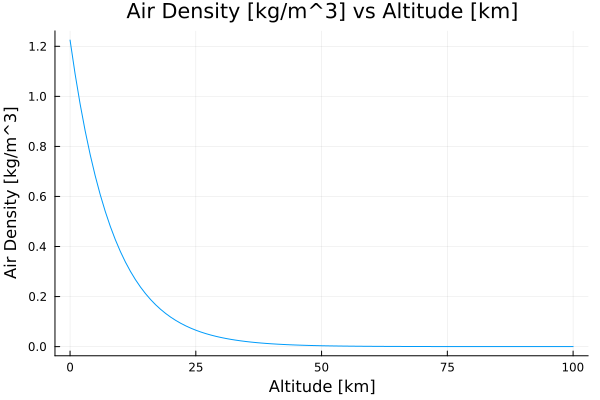

In [3]:
h = 0:1e3:(100e3)
ρ = [calc_rho(am, alt) for alt in h]

plot(h./(1e3), ρ, label=false)
xlabel!("Altitude [km]")
ylabel!("Air Density [kg/m^3]")
title!("Air Density [kg/m^3] vs Altitude [km]")

# Drag Analysis

We define the drag function to be of the form:
$$
D = \frac{1}{2} \rho C_d v^2 A
$$
where $D$ is the drag force, $\rho$ is the air density, $C_d$ is the drag coefficient, $v$ is the airspeed, and $A$ is reference area.

In [4]:
"""
drag(cd, h, v, A)
- Inputs:
-- cd: coefficient of drag
-- h: altitude
-- v: velocity
-- A: reference cross-sectional area
- Outputs:
-- Drag Force
"""
function drag(cd, h, v, A)
    return (0.5).*cd.*[calc_rho(am, alt) for alt in h].*([(vel^2) for vel in v]).*A
end

drag

We define the following parameters for the vehicle/object we want to conduct a drag characterization on:

In [5]:
cd = 0.1;
A = 0.75; # m^2

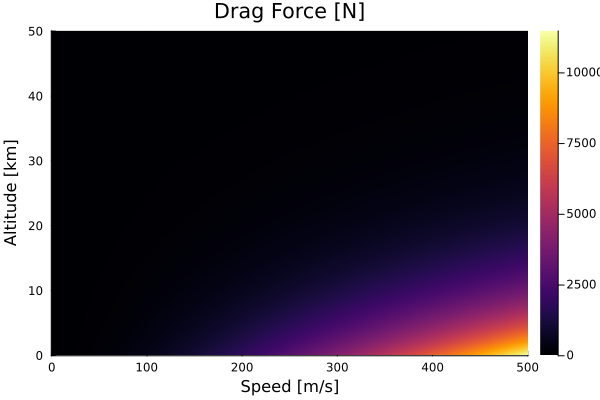

In [6]:
h_range = 0:100:50e3; # altitudes [m] in 1km increments to 100km
v_range = 0:1:500; # speeds [m/s] in 10 m/s increments to ~ Mach 5 @ SSL

hv_pairs = [[h,v] for h in h_range for v in v_range]
drag_forces = [drag(cd, h, v, A) for (h,v) in hv_pairs]
drag_forces = reshape(drag_forces, length(v_range), length(h_range))

heatmap(v_range, h_range./(1e3), drag_forces')
xlabel!("Speed [m/s]")
ylabel!("Altitude [km]")
title!("Drag Force [N]")

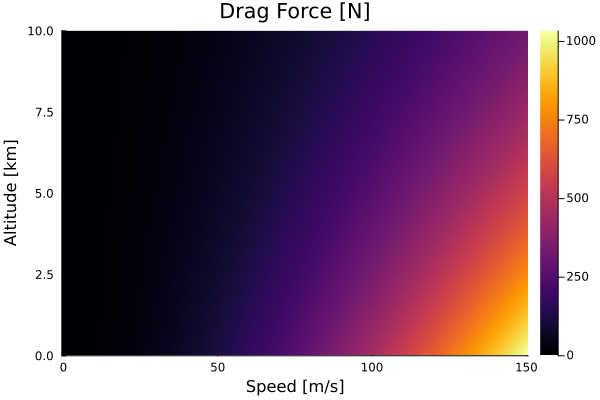

In [7]:
h_range = 0:1:10e3; # altitudes [m] in 1km increments to 100km
v_range = 0:1:150; # speeds [m/s] in 10 m/s increments to ~ Mach 5 @ SSL

hv_pairs = [[h,v] for h in h_range for v in v_range]
drag_forces = [drag(cd, h, v, A) for (h,v) in hv_pairs]
drag_forces = reshape(drag_forces, length(v_range), length(h_range))

heatmap(v_range, h_range./(1e3), drag_forces')
xlabel!("Speed [m/s]")
ylabel!("Altitude [km]")
title!("Drag Force [N]")

# C_d Impact
We rerun the above analysis for a fixed $A$ but while varying $C_d$

┌ Info: Saved animation to C:\Users\kavin\AppData\Local\Temp\jl_wJGJSxuF2h.gif
└ @ Plots C:\Users\kavin\.julia\packages\Plots\kLeqV\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\kavin\\AppData\\Local\\Temp\\jl_wJGJSxuF2h.gif")
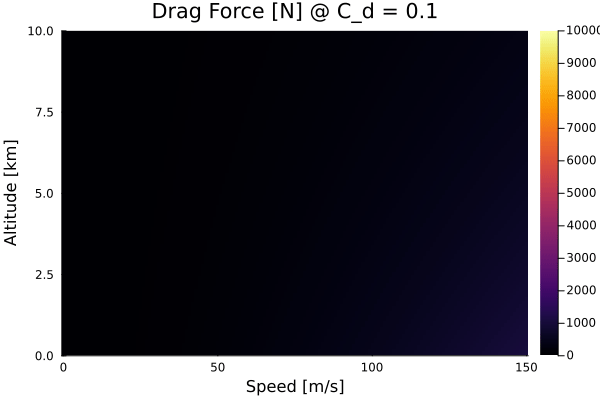

In [12]:
h_range = 0:1:10e3; # altitudes [m] in 1km increments to 100km
v_range = 0:1:150; # speeds [m/s] in 10 m/s increments to ~ Mach 5 @ SSL

cd_sweep = @animate for cd in 0.1:0.05:0.9
    drag_forces = [drag(cd, h, v, A) for (h,v) in hv_pairs]
    drag_forces = reshape(drag_forces, length(v_range), length(h_range))

    heatmap(v_range, h_range./(1e3), drag_forces')
    xlabel!("Speed [m/s]")
    ylabel!("Altitude [km]")
    title!("Drag Force [N] @ C_d = $(cd)")
    plot!(clim=(0, 1e4))
end
gif(cd_sweep)